In [2]:
#Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pybaseball import team_batting
import seaborn as sns

#Linear regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score



#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

#Data
from mega import model_df
from mega import unplayed_games




In [3]:
#Copying and Viewing our data
df=model_df.copy()

display(df.head())
display(df.tail())

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,1,L,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,W,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,W,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,W,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,W,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
1808,129,L,N,A,NYY,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,130,W,D,A,NYY,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,131,L,D,A,NYY,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,132,W,N,H,MIA,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4
1812,133,L,N,H,MIA,35,0.342857,12,2,5,0.428571,6,34,0.382353,13,4,8,0.405405,1


In [4]:
#Removing game number, index works just fine.
df=df.drop("Gm#",axis=1) 
display(df.head())
display(df.tail())

,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,L,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,W,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,W,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,W,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,W,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
1808,L,N,A,NYY,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,W,D,A,NYY,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,L,D,A,NYY,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,W,N,H,MIA,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4
1812,L,N,H,MIA,35,0.342857,12,2,5,0.428571,6,34,0.382353,13,4,8,0.405405,1


## Going Through Linear and Logistic Regression Models

### Linear

In [5]:
#The first step is getting the already preworked data into a useable format. 
#This includes the binary values and the categorical.

#Converting the binary columns with dummies.
dummies= pd.get_dummies(df[['W/L', 'D/N', 'H/A']], drop_first=True).astype(int)
df[['W/L', 'D/N', 'H/A']]=dummies[["W/L_W","D/N_N","H/A_H"]]

df.head()

,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,0,0,0,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,1,1,0,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,1,1,0,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,1,0,1,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,1,1,1,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


In [6]:
#Now to convert the opponent column into values.

#Getting the label encoder
encoder=LabelEncoder()
#Fit and transform the categorical column
df['Opp'] = encoder.fit_transform(df['Opp'])
df.head()

,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,0,0,0,14,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,1,1,0,14,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,1,1,0,14,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,1,0,1,21,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,1,1,1,21,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


In [7]:
#Listing the columns to make sure the continuous columns are numeric in order to scale
column_list = df.columns.tolist()
categorical_cols={"W/L","D/N","H/A","Opp"}
continuous_cols=list(set(column_list) - categorical_cols)
continuous_cols


#Making sure any non numeric data gets converted to nans.
df[continuous_cols] = df[continuous_cols].apply(pd.to_numeric, errors='coerce')
#dropping those as they'd mess up the data
df=df.dropna()

In [8]:
#Now that the data is cleaned up we can train test split.
X=df.drop(columns="W/L")
y=df["W/L"]
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=69)

In [9]:
cat=["D/N","H/A","Opp"]
#Getting the scaler ready
scaler=StandardScaler()

#Fit and transform
x_train_scaled=scaler.fit_transform(X_train[continuous_cols])
x_test_scaled=scaler.transform(X_test[continuous_cols])

#Adding back the categorical data
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=continuous_cols,index=X_train.index)
x_train_final=pd.concat([x_train_scaled_df,X_train[cat]],axis=1)
x_train_final=x_train_final.dropna()

x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=continuous_cols,index=X_test.index)
x_test_final=pd.concat([x_test_scaled_df,X_test[cat]],axis=1)
x_test_final=x_test_final.dropna()

In [10]:
#Making the model
lr=LinearRegression()
# Fit the model using the training data
lr.fit(x_train_final, y_train)

LinearRegression()

In [11]:
#Making predictions
prediction=lr.predict(x_test_final)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.1472528092534297
R² Score: 0.3955501553745512


In [13]:
lr.score(x_test_final, y_test)

0.3955501553745512

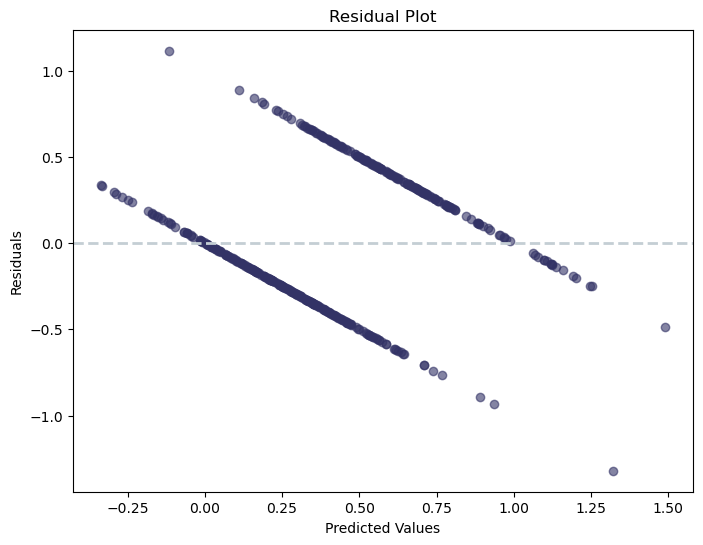

In [14]:
# Calculate residuals
residuals = y_test - prediction

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(prediction, residuals, color='#333366', alpha=0.6)
plt.axhline(y=0, color='#C4CED4', linestyle='--', linewidth=2)

# Add titles and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig("Linear Reg Wins residual plot")
# Show the plot
plt.show()


The MSE is a low value which indicates good performance. The R² score is low however.

### Logistic

In [15]:
# Initialize the logistic regression model
lrm = LogisticRegression(random_state=2,max_iter=1000)

# Fit the model using the training data
lrm.fit(x_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [16]:
#Predicting 
y_train_pred = lrm.predict(x_train_final)
y_test_pred = lrm.predict(x_test_final)

In [17]:
#Scoring the model
lrm_train_score=accuracy_score(y_train, y_train_pred)
lrm_test_score=accuracy_score(y_test, y_test_pred)
print(f"lrm train score: {lrm_train_score}")
print(f"lrm test score: {lrm_test_score}")

lrm train score: 0.7917620137299771
lrm test score: 0.8105022831050228


In [18]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[220  34]
 [ 49 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       254
           1       0.80      0.73      0.76       184

    accuracy                           0.81       438
   macro avg       0.81      0.80      0.80       438
weighted avg       0.81      0.81      0.81       438



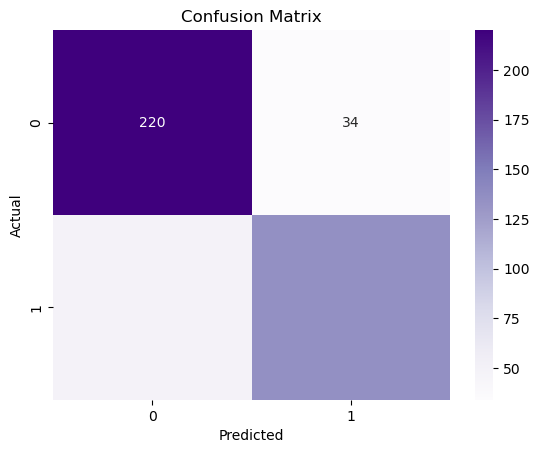

In [19]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("Conf Matrix Log Reg.png")
plt.show()

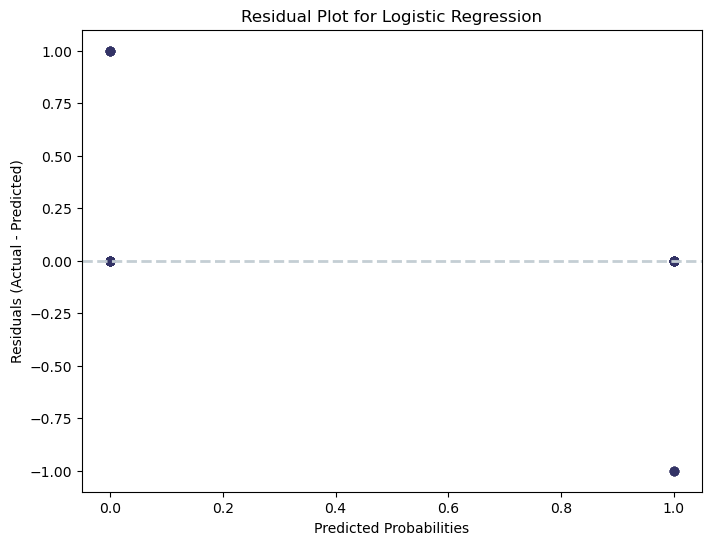

In [21]:
# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='#333366', alpha=0.1)
plt.axhline(y=0, color='#C4CED4', linestyle='--', linewidth=2)

# Add titles and labels
plt.title('Residual Plot for Logistic Regression')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals (Actual - Predicted)')

# Save the plot
plt.savefig("Logistic Reg Residual Plot")
# Show the plot
plt.show()


The logistic regression model achieved 81% accuracy, effectively identifying both classes with good precision and recall, meaning it correctly predicted outcomes with a reasonable balance between false positives and false negatives.

### Comparing the models

In [274]:
print(f"The linear model scored {r2:.4f}")
print(f"The logistic model scored {lrm_test_score:.4f}")

The linear model scored 0.3956
The logistic model scored 0.8128


The logistic regression model outperformed the linear regression model with an accuracy score of 81.28% compared to 39.56%, indicating that the logistic model provided a more reliable classification of outcomes.

### Using the Logistic model on the unplayed games

In [275]:
#Bringing in the unplayed games data.
unplayed_df=unplayed_games.copy()
unplayed_df=unplayed_df.drop(columns="Gm#")
unplayed_df.head(3)

,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
1813,8:40 pm,Game Preview and Matchups,H,MIA,33,0.242424,8,1,10,0.285714,2,30,0.300000,9,1,10,0.416667,6
1814,3:10 pm,Game Preview and Matchups,H,MIA,42,0.428571,18,2,7,0.489362,4,36,0.333333,12,3,10,0.390244,4
1815,8:40 pm,Game Preview and Matchups,H,BAL,-1,0.314286,-1,-1,6,-1.000000,-1,33,0.303030,10,1,6,0.303030,0


In [276]:
#Converting D/N to D/N based on the time in the W/L Col
unplayed_df["D/N"]=unplayed_df["W/L"]
gametimes=unplayed_df["D/N"].unique().tolist()

In [277]:
# Define cutoff time
cutoff_time = datetime.strptime('6:00 pm', '%I:%M %p')

# Create the dictionary with inline logic
time_labels = {
    time: 'D' if datetime.strptime(time, '%I:%M %p') < cutoff_time else 'N'
    for time in gametimes
}
#Converting the times based on the time to d/n
unplayed_df["D/N"]=unplayed_df["D/N"].map(time_labels)
unplayed_df.head()

,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
1813,8:40 pm,N,H,MIA,33,0.242424,8,1,10,0.285714,2,30,0.300000,9,1,10,0.416667,6
1814,3:10 pm,D,H,MIA,42,0.428571,18,2,7,0.489362,4,36,0.333333,12,3,10,0.390244,4
1815,8:40 pm,N,H,BAL,-1,0.314286,-1,-1,6,-1.000000,-1,33,0.303030,10,1,6,0.303030,0
1816,8:10 pm,N,H,BAL,-1,-1.000000,-1,-1,-1,-1.000000,-1,29,0.310345,9,0,9,0.393939,4
1817,3:10 pm,D,H,BAL,-1,-1.000000,-1,-1,-1,-1.000000,-1,30,0.200000,6,0,11,0.250000,2


In [278]:
opp_list=unplayed_df["Opp"].unique().tolist()
opp_list

['MIA', 'BAL', 'ATL', 'MIL', 'DET', 'CHC', 'ARI', 'LAD', 'STL']

In [279]:
# Get the team batting stats for the current season (you can specify a year if needed)
team_stats = team_batting(start_season=2024)
ts_cl=team_stats.columns.tolist()
team_stats.head()
# ts_cl

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,9,2024,NYY,29,2018,4787,5479,1202,757,217,...,120.0,1564,0.421,3713,0.177,0.272,NaN,NaN,NaN,30.3
1,15,2024,ARI,28,2136,4865,5528,1269,821,236,...,117.0,1492,0.388,3845,0.173,0.265,NaN,NaN,NaN,27.7
2,22,2024,LAD,30,2087,4832,5463,1225,750,259,...,119.2,1510,0.408,3697,0.159,0.266,NaN,NaN,NaN,28.2
3,26,2024,PHI,29,2022,4880,5448,1269,821,254,...,115.6,1489,0.398,3741,0.156,0.269,NaN,NaN,NaN,24.5
4,2,2024,BAL,28,2112,4903,5447,1230,753,235,...,114.4,1599,0.424,3773,0.159,0.266,NaN,NaN,NaN,25.9


In [280]:
#Setting up a new smaller df for the averages
avg_df=team_stats[["Team","AVG","OBP"]]
avg_df=avg_df.rename(columns={"AVG":"Opp_ba","Team":"Opp", "OBP":"Opp_obp"})
avg_df.head()

,Opp,Opp_ba,Opp_obp
0,NYY,0.251,0.334
1,ARI,0.261,0.335
2,LAD,0.254,0.330
3,PHI,0.260,0.329
4,BAL,0.251,0.317


In [281]:
#Converting everything to averages so that the log reg model will be more applicable
avg_df["Opp_at_bats"] = team_stats['AB'] / team_stats['G']
avg_df["OPP_kk"]=team_stats['SO']/team_stats['G']
avg_df["Opp_walks"] = team_stats['BB'] / team_stats['G']
avg_df["Opp_hits"]=team_stats['H']/team_stats['G']
avg_df["OPP_HR_Column"]=team_stats['HR']/team_stats['G']

avg_df.head()

,Opp,Opp_ba,Opp_obp,Opp_at_bats,OPP_kk,Opp_walks,Opp_hits,OPP_HR_Column
0,NYY,0.251,0.334,2.372151,0.565907,0.287909,0.595639,0.105550
1,ARI,0.261,0.335,2.277622,0.522004,0.232678,0.594101,0.083801
2,LAD,0.254,0.330,2.315285,0.572113,0.247724,0.586967,0.092477
3,PHI,0.260,0.329,2.413452,0.588032,0.228981,0.627596,0.085064
4,BAL,0.251,0.317,2.321496,0.559186,0.205019,0.582386,0.099905


In [282]:
#Pulling out COL info:
Rockies_df = avg_df[avg_df["Opp"] == "COL"]
Rockies_df=Rockies_df.rename({"Opp_at_bats":"COL_at_bats",
                              "Opp_ba":"COL_ba",
                              "Opp_hits":"COL_hits", 
                              "OPP_HR_Column":"COL_hr",
                              "OPP_kk":"COL_kk",
                              "Opp_obp":"COL_obp",
                              "Opp_walks":"COL_walks",
                              "Opp":"W/L"
                              },
                              axis=1)
Rockies_df.set_index("W/L",inplace=True)
Rockies_df

,COL_ba,COL_obp,COL_at_bats,COL_kk,COL_walks,COL_hits,COL_hr
W/L,,,,,,,
COL,0.242,0.304,2.41009,0.710789,0.200799,0.582917,0.077423


In [283]:
#Bringing in the opp averages
# Set index to update
unplayed_df.set_index("Opp", inplace=True)
avg_df.set_index("Opp", inplace=True)

# Use the update method to overwrite the matching columns
unplayed_df.update(avg_df)
unplayed_df.reset_index(inplace=True)
unplayed_df.head()

,Opp,W/L,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,MIA,8:40 pm,N,H,33,0.242424,8,1,10,0.285714,2,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
1,MIA,3:10 pm,D,H,42,0.428571,18,2,7,0.489362,4,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
2,BAL,8:40 pm,N,H,-1,0.314286,-1,-1,6,-1.000000,-1,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019
3,BAL,8:10 pm,N,H,-1,-1.000000,-1,-1,-1,-1.000000,-1,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019
4,BAL,3:10 pm,D,H,-1,-1.000000,-1,-1,-1,-1.000000,-1,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019


In [284]:
#Merging the Rockies data into the unplayed games.

unplayed_df["W/L"]="COL"
unplayed_df.set_index("W/L",inplace=True)

unplayed_df.update(Rockies_df)
unplayed_df.reset_index(inplace=True)
unplayed_df.head()


,W/L,Opp,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,COL,MIA,N,H,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
1,COL,MIA,D,H,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
2,COL,BAL,N,H,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019
3,COL,BAL,N,H,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019
4,COL,BAL,D,H,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019


In [285]:
#Converting the binary columns with dummies.
udummies= pd.get_dummies(unplayed_df[['D/N', 'H/A']], drop_first=True).astype(int)
unplayed_df[['D/N', 'H/A']]=udummies[["D/N_N","H/A_H"]]

unplayed_df.head()

,W/L,Opp,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,COL,MIA,1,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
1,COL,MIA,0,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
2,COL,BAL,1,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019
3,COL,BAL,1,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019
4,COL,BAL,0,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019


In [286]:
#Encoding the opp col
unplayed_df['Opp'] = encoder.fit_transform(unplayed_df['Opp'])
unplayed_df.head(3)

,W/L,Opp,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,COL,6,1,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
1,COL,6,0,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.244993,0.240,0.539823,0.061015,0.568235,0.296,0.160224
2,COL,2,1,1,2.41009,0.242,0.582917,0.077423,0.710789,0.304,0.200799,2.321496,0.251,0.582386,0.099905,0.559186,0.317,0.205019


In [287]:
#Reordering columns
unplayed_df=unplayed_df.drop("W/L",axis=1)
unplayed_df=unplayed_df[x_train_final.columns]


In [288]:
#Splitting the data based on data type.
unplayed_cat=unplayed_df[cat]
display(unplayed_cat.head())
unplayed_cont=unplayed_df[continuous_cols]
display(unplayed_cont.head())

,D/N,H/A,Opp
0,1,1,6
1,0,1,6
2,1,1,2
3,1,1,2
4,0,1,2


,COL_hr,COL_at_bats,Opp_obp,Opp_hits,COL_kk,Opp_ba,COL_obp,COL_ba,COL_hits,OPP_kk,Opp_at_bats,OPP_HR_Column,Opp_walks,COL_walks
0,0.077423,2.41009,0.296,0.539823,0.710789,0.240,0.304,0.242,0.582917,0.568235,2.244993,0.061015,0.160224,0.200799
1,0.077423,2.41009,0.296,0.539823,0.710789,0.240,0.304,0.242,0.582917,0.568235,2.244993,0.061015,0.160224,0.200799
2,0.077423,2.41009,0.317,0.582386,0.710789,0.251,0.304,0.242,0.582917,0.559186,2.321496,0.099905,0.205019,0.200799
3,0.077423,2.41009,0.317,0.582386,0.710789,0.251,0.304,0.242,0.582917,0.559186,2.321496,0.099905,0.205019,0.200799
4,0.077423,2.41009,0.317,0.582386,0.710789,0.251,0.304,0.242,0.582917,0.559186,2.321496,0.099905,0.205019,0.200799


In [289]:
#Scaling the data
unplayed_scaled = scaler.transform(unplayed_df[continuous_cols])
unplayed_scaled_df=pd.DataFrame(unplayed_scaled,columns=continuous_cols,index=unplayed_df.index)


In [290]:
#Recombinging the data.
X_unplayed = pd.concat([unplayed_scaled_df,unplayed_cat], axis=1)



In [291]:
#Making predictions!!!
w_l_predictions=lrm.predict(X_unplayed)

#Making a df
unplayed_df["W/L pred"]=w_l_predictions
unplayed_df

,COL_hr,COL_at_bats,Opp_obp,Opp_hits,COL_kk,Opp_ba,COL_obp,COL_ba,COL_hits,OPP_kk,Opp_at_bats,OPP_HR_Column,Opp_walks,COL_walks,D/N,H/A,Opp,W/L pred
0,0.077423,2.41009,0.296,0.539823,0.710789,0.240,0.304,0.242,0.582917,0.568235,2.244993,0.061015,0.160224,0.200799,1,1,6,1
1,0.077423,2.41009,0.296,0.539823,0.710789,0.240,0.304,0.242,0.582917,0.568235,2.244993,0.061015,0.160224,0.200799,0,1,6,1
2,0.077423,2.41009,0.317,0.582386,0.710789,0.251,0.304,0.242,0.582917,0.559186,2.321496,0.099905,0.205019,0.200799,1,1,2,1
3,0.077423,2.41009,0.317,0.582386,0.710789,0.251,0.304,0.242,0.582917,0.559186,2.321496,0.099905,0.205019,0.200799,1,1,2,1
4,0.077423,2.41009,0.317,0.582386,0.710789,0.251,0.304,0.242,0.582917,0.559186,2.321496,0.099905,0.205019,0.200799,0,1,2,1
5,0.077423,2.41009,0.307,0.580191,0.710789,0.241,0.304,0.242,0.582917,0.653092,2.408245,0.091001,0.210659,0.200799,1,0,1,1
6,0.077423,2.41009,0.307,0.580191,0.710789,0.241,0.304,0.242,0.582917,0.653092,2.408245,0.091001,0.210659,0.200799,1,0,1,1
7,0.077423,2.41009,0.307,0.580191,0.710789,0.241,0.304,0.242,0.582917,0.653092,2.408245,0.091001,0.210659,0.200799,1,0,1,1
8,0.077423,2.41009,0.330,0.581766,0.710789,0.251,0.304,0.242,0.582917,0.607815,2.319344,0.077183,0.258080,0.200799,1,0,7,1
9,0.077423,2.41009,0.330,0.581766,0.710789,0.251,0.304,0.242,0.582917,0.607815,2.319344,0.077183,0.258080,0.200799,1,0,7,1


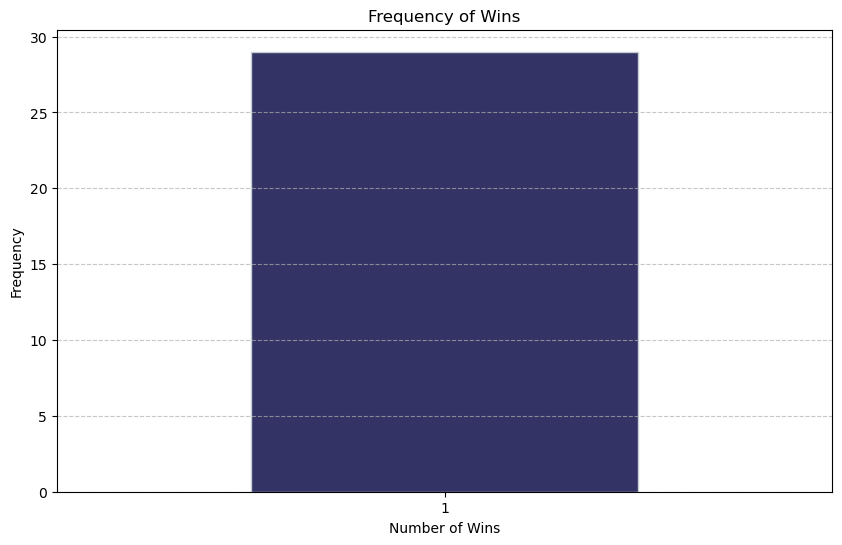

In [319]:

# Calculate frequency of each win value
win_counts = unplayed_df['W/L pred'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='#333366', edgecolor='#C4CED4')
plt.title('Frequency of Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Unplayed Games win predictions.png")
plt.show()

### Trying something else


In [292]:
from mega import mega_concat_df

mega_concat_df = mega_concat_df.iloc[:-29]
mega_concat_df.head()

,Gm#,Date,Tm,H/A,Opp,W/L,R,RA,Inn,W-L,...,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,1,Monday Apr 1,COL,A,MIL,L,4,5,10.0,0-1,...,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,Tuesday Apr 2,COL,A,MIL,W,8,4,NaN,1-1,...,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,Wednesday Apr 3,COL,A,MIL,W,7,3,NaN,2-1,...,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,Friday Apr 5,COL,H,SDP,W,5,2,NaN,3-1,...,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,Saturday Apr 6,COL,H,SDP,W,6,3,NaN,4-1,...,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


What if instead of predicting W/L, we predict the number of runs the Rockies score? 

In [293]:
# Cleaning this df
r_df=mega_concat_df[["R","D/N","H/A","Opp",
                         "COL_at_bats","COL_ba","COL_hits", "COL_hr","COL_kk","COL_obp","COL_walks",
                         "Opp_at_bats","Opp_ba","Opp_hits","OPP_HR_Column","OPP_kk","Opp_obp","Opp_walks"]]
r_df.head()

,R,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,4,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,8,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,7,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,5,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,6,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


In [294]:
# Getting dummies for our runs dataframe 
dummies_r= pd.get_dummies(r_df[['D/N', 'H/A']], drop_first=True).astype(int)
r_df[['D/N', 'H/A']]=dummies_r[["D/N_N","H/A_H"]]

r_df.head()

C:\Users\cassy\AppData\Local\Temp\ipykernel_38576\2007343972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[['D/N', 'H/A']]=dummies_r[["D/N_N","H/A_H"]]


,R,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,4,0,0,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,8,1,0,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,7,1,0,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,5,0,1,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,6,1,1,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


In [295]:
# Using the encoder to fill the opponent
r_df['Opp'] = encoder.fit_transform(r_df['Opp'])
r_df.head(3)

C:\Users\cassy\AppData\Local\Temp\ipykernel_38576\543485400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df['Opp'] = encoder.fit_transform(r_df['Opp'])


,R,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,4,0,0,14,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,8,1,0,14,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,7,1,0,14,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4


In [296]:
#Making sure any non numeric data gets converted to nans.
r_df[continuous_cols] = r_df[continuous_cols].apply(pd.to_numeric, errors='coerce')
#dropping those as they'd mess up the data
r_df=r_df.dropna()


C:\Users\cassy\AppData\Local\Temp\ipykernel_38576\703141975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[continuous_cols] = r_df[continuous_cols].apply(pd.to_numeric, errors='coerce')


In [297]:
r_df["R"]=r_df["R"].astype(int)

In [298]:
#Now that the data is cleaned up we can train test split.
X=r_df.drop(columns="R")
y=r_df["R"]
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=69)

In [299]:
#Fit and transform
x_train_scaled=scaler.fit_transform(X_train[continuous_cols])
x_test_scaled=scaler.transform(X_test[continuous_cols])

#Adding back the categorical data
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=continuous_cols,index=X_train.index)
x_train_final=pd.concat([x_train_scaled_df,X_train[cat]],axis=1)
x_train_final=x_train_final.dropna()

x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=continuous_cols,index=X_test.index)
x_test_final=pd.concat([x_test_scaled_df,X_test[cat]],axis=1)
x_test_final=x_test_final.dropna()

In [300]:
# Fit the model using the training data
lrm.fit(x_train_final, y_train)

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=2)

In [301]:
#Predictions
y_train_pred = lrm.predict(x_train_final)
y_test_pred = lrm.predict(x_test_final)

In [302]:
#Scoring the model
lrm_train_score=accuracy_score(y_train, y_train_pred)
lrm_test_score=accuracy_score(y_test, y_test_pred)
print(f"lrm train score: {lrm_train_score}")
print(f"lrm test score: {lrm_test_score}")

lrm train score: 0.2486651411136537
lrm test score: 0.18036529680365296


In [303]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[ 9  4  9  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  8  8 13  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  8 10 22  3  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  5  9 24  6  9  2  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 19  5 10  3  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3 24  3 11  3  4  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 12  5  7  4  4  2  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  2  5  0  8  2  4  1  0  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  3  6  1 10  2  6  0  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  0  3  7  3  1  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  1  2  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  2  1  1  1  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  1  1  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\metrics\_cla

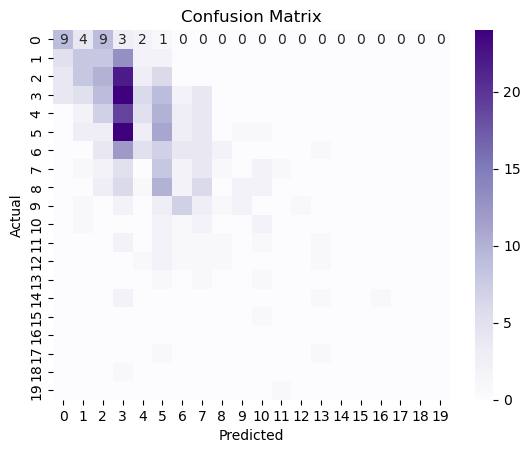

In [305]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("Conf Matrix Log Reg Runs.png")
plt.show()

In [184]:
#Using LR to predict instead.
lr.fit(x_train_final, y_train)

LinearRegression()

In [186]:
#Predicting and scoring
prediction=lr.predict(x_test_final)
# Evaluate the model
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6.070369526995784
R² Score: 0.4692786543993087


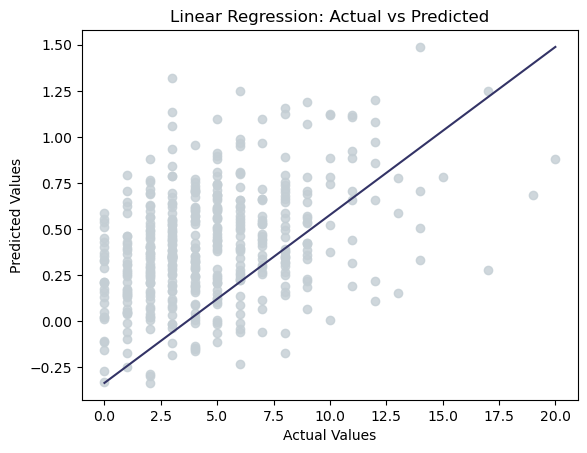

In [323]:
plt.scatter(y_test, prediction, alpha=0.8, color="#C4CED4")
plt.plot([min(y_test), max(y_test)], [min(prediction), max(prediction)], color='#333366')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

plt.savefig("LinearRegression pred v act Runs.png")